In [1]:
##LECTURA DEL FICHERO SPSS Y SUS METADATOS
##Debe estar instalado el paquete de pyreadstat que permite leer ficheros SPSS y SAS
import pyreadstat
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
pd.options.display.max_colwidth = 500
pd.options.display.max_rows = 999
pd.options.display.max_columns = 9999

In [3]:
#d1 = pd.read_csv('DatosOtrasFuentes.csv',sep=';')

d2 = pd.read_csv('PCAReguntasESC.csv')
d2 = d2.reindex(sorted(d2.columns), axis=1)

d3 = pd.read_csv('PCAReguntasPRO.csv')
d3 = d3.reindex(sorted(d3.columns), axis=1)

d4 = pd.read_csv('PCAReguntasEST.csv')
d4 = d4.reindex(sorted(d4.columns), axis=1)


In [4]:
d2[d2['CNTSCHID']==72400134]

,CLSIZE_0,CNTSCHID,CREACTIV_0,CREACTIV_0_1,CREACTIV_0_1_2,CREACTIV_0_1_2_3,DATCOLE_0,DIFPREPA_0,DIFPREPA_0_1,DIFPREPA_0_1_2,DIFPREPA_0_1_2_3,DIFPRESU_0,DIFPRESU_0_1,DIFPRESU_0_1_2,DIFPRESU_0_1_2_3,DIGIEDU_0,DIGIEDU_0_1,DIGIEDU_0_1_2,DIVECUL_0,EDUINTE_0,EDUINTE_0_1,EDUINTE_0_1_2,EVAALU_0,FORPRO_0,FRAESCO_0,FRAESCO_0_1,FRAESCO_0_1_2,FRAESCO_0_1_2_3,FRAESCO_0_1_2_3_4,GARCOLE_0,GRAFAMI_0,HORPRO_0,HORPRO_0_1,ORIEDU_0,ORIEDU_0_1,ORIEDU_0_1_2,ORIEDU_0_1_2_3,ORIEDU_0_1_2_3_4,PESCURRI_0,PESCURRI_0_1,PESCURRI_0_1_2,POLEQUI_0,POLEQUI_0_1,POLEQUI_0_1_2,POLEQUI_0_1_2_3,PREPCEN_0,PRODIVCUL_0,PROGLO_0,PROGLO_0_1,PROGLO_0_1_2,SC001Q01TA_0,SC011Q01TA_0,SC011Q01TA_0_1,SC042Q01TA_0,SC042Q02TA_0,SC048Q01NA_0,SC048Q02NA_0,SC048Q03NA_0,SC167Q06HA_0,SCHLTYPE_0,SCHSIZE_0,STRATIO_0,TECCEN_0,TECCEN_0_1,TECCEN_0_1_2,TECCEN_0_1_2_3,TECCEN_0_1_2_3_4,Unnamed: 0
133,100.0,72400134.0,17.184121,41.350891,69.809962,50.693934,49.655606,27.151743,42.617434,53.013191,53.348391,55.046732,40.485907,72.118325,50.086308,53.351426,9.436896e-14,24.984666,5.300768,21.112985,0.0,100.0,4.126746,54.431857,55.388863,55.199201,36.499529,2.682821,16.614028,47.936826,0.0,47.81237,23.541187,47.337052,84.106954,1.945327,35.67449,34.821147,23.219835,90.662335,2.182489,2.364222,37.821853,51.065165,66.863493,0.0,8.520962e-13,43.631437,49.624408,3.760880e-13,13.437149,45.541121,0.0,74.6591,5.839773e-12,90.0,40.747339,23.251051,5.086209e-13,0.0,21.508585,32.857858,31.732951,35.337907,61.399818,25.147497,26.634512,133


In [5]:
datos = pd.merge(d2, d3,on='CNTSCHID')

In [6]:
datos2 = pd.merge(datos, d4,on='CNTSCHID')

In [7]:
datos2

,CLSIZE_0,CNTSCHID,CREACTIV_0,CREACTIV_0_1,CREACTIV_0_1_2,CREACTIV_0_1_2_3,DATCOLE_0,DIFPREPA_0,DIFPREPA_0_1,DIFPREPA_0_1_2,DIFPREPA_0_1_2_3,DIFPRESU_0,DIFPRESU_0_1,DIFPRESU_0_1_2,DIFPRESU_0_1_2_3,DIGIEDU_0,DIGIEDU_0_1,DIGIEDU_0_1_2,DIVECUL_0,EDUINTE_0,EDUINTE_0_1,EDUINTE_0_1_2,EVAALU_0,FORPRO_0,FRAESCO_0,FRAESCO_0_1,FRAESCO_0_1_2,FRAESCO_0_1_2_3,FRAESCO_0_1_2_3_4,GARCOLE_0,GRAFAMI_0,HORPRO_0,HORPRO_0_1,ORIEDU_0,ORIEDU_0_1,ORIEDU_0_1_2,ORIEDU_0_1_2_3,ORIEDU_0_1_2_3_4,PESCURRI_0,PESCURRI_0_1,PESCURRI_0_1_2,POLEQUI_0,POLEQUI_0_1,POLEQUI_0_1_2,POLEQUI_0_1_2_3,PREPCEN_0,PRODIVCUL_0,PROGLO_0,PROGLO_0_1,PROGLO_0_1_2,SC001Q01TA_0,SC011Q01TA_0,SC011Q01TA_0_1,SC042Q01TA_0,SC042Q02TA_0,SC048Q01NA_0,SC048Q02NA_0,SC048Q03NA_0,SC167Q06HA_0,SCHLTYPE_0,SCHSIZE_0,STRATIO_0,TECCEN_0,TECCEN_0_1,TECCEN_0_1_2,TECCEN_0_1_2_3,TECCEN_0_1_2_3_4,Unnamed: 0,AUTOPER_0,AUTOPER_0_1,AUTOPER_0_1_2,AUTOPER_0_1_2_3,CRIEALUM_0,CRIEALUM_0_1,CRIEALUM_0_1_2,CRIEALUM_0_1_2_3,CRIEALUM_0_1_2_3_4,CRIEALUM_0_1_2_3_4_5,CRIEALUM_0_1_2_3_4_5_6,CRIEALUM_0_1_2_3_4_5_6_7,CULCENC_0,CULCENC_0_1,CULCENC_0_1_2,CULCENC_0_1_2_3,DIFIDO_0,DIFIDO_0_1,ESENMULTI_0,ESENMULTI_0_1,ESENMULTI_0_1_2,ESENMULTI_0_1_2_3,FORDOC_0,FORDOC_0_1,FORDOC_0_1_2,FORDOC_0_1_2_3,IMEVAL_0,IMEVAL_0_1,IMEVAL_0_1_2,IMEVAL_0_1_2_3,IMEVAL_0_1_2_3_4,IMEVAL_0_1_2_3_4_5,IMHAED_0,IMHAED_0_1,IMHAED_0_1_2,IMHAED_0_1_2_3,INTDOC_0,INTDOC_0_1,INTDOC_0_1_2,INTDOC_0_1_2_3,MECENALU_0,MECENALU_0_1,MECENALU_0_1_2,MECENALU_0_1_2_3,MECENALU_0_1_2_3_4,MEINCLU_0,MEINCLU_0_1,MEINCLU_0_1_2,MEINCLU_0_1_2_3,MEINCLU_0_1_2_3_4,METICD_0,METICD_0_1,METICD_0_1_2,METICD_0_1_2_3,METICD_0_1_2_3_4,NECEFOR_0,NECEFOR_0_1,NECEFOR_0_1_2,NECEFOR_0_1_2_3,OPIMIGR_0,OPIMIGR_0_1,OPIMIGR_0_1_2,OPIMIGR_0_1_2_3,PERDIEN_0,PERDIEN_0_1,PERDIEN_0_1_2,PERDIEN_0_1_2_3,PRODICUL_0,PRODICUL_0_1,PRODICUL_0_1_2,PRODIV_0,PROGLOD_0,PROGLOD_0_1,SSKILL_0,SSKILL_0_1,TC002Q01NA_0,TICAU_0,TICAU_0_1,TICAU_0_1_2,TICAU_0_1_2_3,TIEXP_0,TRACOLDO_0,TRACOLDO_0_1,TRACOLDO_0_1_2,TRACOLDO_0_1_2_3,UTLECCA_0,UTLECCA_0_1,UTLECCA_0_1_2,UTLECCA_0_1_2_3,UTLECIN_0,UTLECIN_0_1,UTLECIN_0_1_2,UTLECIN_0_1_2_3,ABSESC_0,ABSESC_0_1,ABSESC_0_1_2,ABSESC_0_1_2_3,ACERESCU_0,ACERESCU_0_1,ACERESCU_0_1_2,ACERESCU_0_1_2_3,ACERESCU_0_1_2_3_4,ACERESCU_0_1_2_3_4_5,ACOESCO_0,ACOESCO_0_1,ACOESCO_0_1_2,ACOESCO_0_1_2_3,ACOESCO_0_1_2_3_4,ACTIFIS_0,ACTIFIS_0_1,ACTIFIS_0_1_2,ACTIFIS_0_1_2_3,ACTIFIS_0_1_2_3_4,APLIEDUFIN_0,APLIEDUFIN_0_1,APLIEDUFIN_0_1_2,APLIEDUFIN_0_1_2_3,APLIEDUFIN_0_1_2_3_4,APOACTEDU_0,APOACTEDU_0_1,APOACTEDU_0_1_2,APOACTEDU_0_1_2_3,APOACTEDU_0_1_2_3_4,APRECAPEN_0,APRECAPEN_0_1,APRECAPEN_0_1_2,APRECAPEN_0_1_2_3,APRECAPEN_0_1_2_3_4,APRECAPEN_0_1_2_3_4_5,APRECAPEN_0_1_2_3_4_5_6,ASIREES_0,ASIREES_0_1,ASIREES_0_1_2,AUTPROFU_0,AUTPROFU_0_1,AUTPROFU_0_1_2,BAGACUL_0,BAGACUL_0_1,CAMESCO_0,CAMESCO_0_1,CAMESCO_0_1_2,CAMESCO_0_1_2_3,CAPAADAP_0,CAPAADAP_0_1,CAPAADAP_0_1_2,CAPAADAP_0_1_2_3,CAPADI_0,CAPADI_0_1,CAPADI_0_1_2,CAPADI_0_1_2_3,CAPADI_0_1_2_3_4,CAPAEMP_0,CAPAEMP_0_1,CAPAEMP_0_1_2,CAPAEMP_0_1_2_3,CCAA,CNTSCHID.1,COMPENAL_0,COMPENAL_0_1,COMPENAL_0_1_2,COMPENAL_0_1_2_3,COMPLECT_0,COMPLECT_0_1,COMPLECT_0_1_2,COMPLECT_0_1_2_3,COMPLECT_0_1_2_3_4,COMPLECT_0_1_2_3_4_5,CONCIIM_0,CONCIIM_0_1,CONCIIM_0_1_2,CONCIIM_0_1_2_3,COOALUM_0,COOALUM_0_1,COOALUM_0_1_2,EDUFAM_0,EDUFAM_0_1,EDUFAM_0_1_2,EDUFAM_0_1_2_3,EDUFAM_0_1_2_3_4,EDUFAM_0_1_2_3_4_5,EDUFINACA_0,EDUFINACA_0_1,EDUFINACA_0_1_2,EDUFINACA_0_1_2_3,EDUFINACO_0,EDUFINACO_0_1,EDUFINACO_0_1_2,EDUFINACO_0_1_2_3,EDUTECCEN_0,EDUTECCEN_0_1,EDUTECCEN_0_1_2,EDUTECCO_0,EDUTECCO_0_1,EDUTECCO_0_1_2,EMOASICL_0,EMOASICL_0_1,EMOASICL_0_1_2,EMOASIDE_0,EMOASIDE_0_1,EMOASIDE_0_1_2,EMODIA_0,EMODIA_0_1,EMODIA_0_1_2,EMORECOL_0,EMORECOL_0_1,EMORECOL_0_1_2,EMOREFUCO_0,EMOREFUCO_0_1,EMOREFUCO_0_1_2,EXPCUL_0,EXPCUL_0_1,EXPCUL_0_1_2,EXPEPRO_0,EXPEPRO_0_1,EXPEPRO_0_1_2,EXPEPRO_0_1_2_3,EXPEPRO_0_1_2_3_4,FALDISC_0,FALDISC_0_1,FALDISC_0_1_2,GLOBAL1,GLOBAL2,HALEC_0,HALEC_0_1,HALEC_0_1_2,HALEC_0_1_2_3,HANLEC_0,HANLEC_0_1,HANLEC_0_1_2,INAMBI_0,INAMBI_0_1,INAMBI_0_1_2,METOPARTI_0,METOPARTI_0_

In [8]:
#datos2.to_csv('Datosmod.csv')

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
#datos['CNTSCHID'] = d1['CNTSCHID']
#datos['CNTSTUID'] = d1['CNTSTUID']
#datos['LECTURA1'] = min_max_scaler.fit_transform(d1['LECTURA1'].values.reshape(-1, 1))*100
#datos['MATES1'] = min_max_scaler.fit_transform(d1['MATES1'].values.reshape(-1, 1))*100
#datos['CIENCIA1'] = min_max_scaler.fit_transform(d1['CIENCIA1'].values.reshape(-1, 1))*100
datos2['GLOBAL1'] = min_max_scaler.fit_transform(datos2['GLOBAL1'].values.reshape(-1, 1))*100
#datos['LECTURA2'] = min_max_scaler.fit_transform(d1['LECTURA2'].values.reshape(-1, 1))*100
#datos['MATES2'] = min_max_scaler.fit_transform(d1['MATES2'].values.reshape(-1, 1))*100
#datos['CIENCIA2'] = min_max_scaler.fit_transform(d1['CIENCIA2'].values.reshape(-1, 1))*100
datos2['GLOBAL2'] = min_max_scaler.fit_transform(datos2['GLOBAL2'].values.reshape(-1, 1))*100
#datos = datos.groupby(['CNTSCHID']).mean()

In [10]:
pd.DataFrame(d2[d2['CNTSCHID']==72400134].columns).to_csv('col')
#pd.DataFrame(d4[d4['CNTSCHID']==72400134].columns).to_csv('col')
#pd.DataFrame(d3[d3['CNTSCHID']==72400134].columns).to_csv('col')

In [11]:
dataMod = datos2.drop(['GLOBAL1', 'GLOBAL2','Unnamed: 0','CNTSCHID', 'SC167Q06HA_0'],axis=1)

In [32]:
dataMod

,CLSIZE_0,CREACTIV_0,CREACTIV_0_1,CREACTIV_0_1_2,CREACTIV_0_1_2_3,DATCOLE_0,DIFPREPA_0,DIFPREPA_0_1,DIFPREPA_0_1_2,DIFPREPA_0_1_2_3,DIFPRESU_0,DIFPRESU_0_1,DIFPRESU_0_1_2,DIFPRESU_0_1_2_3,DIGIEDU_0,DIGIEDU_0_1,DIGIEDU_0_1_2,DIVECUL_0,EDUINTE_0,EDUINTE_0_1,EDUINTE_0_1_2,EVAALU_0,FORPRO_0,FRAESCO_0,FRAESCO_0_1,FRAESCO_0_1_2,FRAESCO_0_1_2_3,FRAESCO_0_1_2_3_4,GARCOLE_0,GRAFAMI_0,HORPRO_0,HORPRO_0_1,ORIEDU_0,ORIEDU_0_1,ORIEDU_0_1_2,ORIEDU_0_1_2_3,ORIEDU_0_1_2_3_4,PESCURRI_0,PESCURRI_0_1,PESCURRI_0_1_2,POLEQUI_0,POLEQUI_0_1,POLEQUI_0_1_2,POLEQUI_0_1_2_3,PREPCEN_0,PRODIVCUL_0,PROGLO_0,PROGLO_0_1,PROGLO_0_1_2,SC001Q01TA_0,SC011Q01TA_0,SC011Q01TA_0_1,SC042Q01TA_0,SC042Q02TA_0,SC048Q01NA_0,SC048Q02NA_0,SC048Q03NA_0,SCHLTYPE_0,SCHSIZE_0,STRATIO_0,TECCEN_0,TECCEN_0_1,TECCEN_0_1_2,TECCEN_0_1_2_3,TECCEN_0_1_2_3_4,AUTOPER_0,AUTOPER_0_1,AUTOPER_0_1_2,AUTOPER_0_1_2_3,CRIEALUM_0,CRIEALUM_0_1,CRIEALUM_0_1_2,CRIEALUM_0_1_2_3,CRIEALUM_0_1_2_3_4,CRIEALUM_0_1_2_3_4_5,CRIEALUM_0_1_2_3_4_5_6,CRIEALUM_0_1_2_3_4_5_6_7,CULCENC_0,CULCENC_0_1,CULCENC_0_1_2,CULCENC_0_1_2_3,DIFIDO_0,DIFIDO_0_1,ESENMULTI_0,ESENMULTI_0_1,ESENMULTI_0_1_2,ESENMULTI_0_1_2_3,FORDOC_0,FORDOC_0_1,FORDOC_0_1_2,FORDOC_0_1_2_3,IMEVAL_0,IMEVAL_0_1,IMEVAL_0_1_2,IMEVAL_0_1_2_3,IMEVAL_0_1_2_3_4,IMEVAL_0_1_2_3_4_5,IMHAED_0,IMHAED_0_1,IMHAED_0_1_2,IMHAED_0_1_2_3,INTDOC_0,INTDOC_0_1,INTDOC_0_1_2,INTDOC_0_1_2_3,MECENALU_0,MECENALU_0_1,MECENALU_0_1_2,MECENALU_0_1_2_3,MECENALU_0_1_2_3_4,MEINCLU_0,MEINCLU_0_1,MEINCLU_0_1_2,MEINCLU_0_1_2_3,MEINCLU_0_1_2_3_4,METICD_0,METICD_0_1,METICD_0_1_2,METICD_0_1_2_3,METICD_0_1_2_3_4,NECEFOR_0,NECEFOR_0_1,NECEFOR_0_1_2,NECEFOR_0_1_2_3,OPIMIGR_0,OPIMIGR_0_1,OPIMIGR_0_1_2,OPIMIGR_0_1_2_3,PERDIEN_0,PERDIEN_0_1,PERDIEN_0_1_2,PERDIEN_0_1_2_3,PRODICUL_0,PRODICUL_0_1,PRODICUL_0_1_2,PRODIV_0,PROGLOD_0,PROGLOD_0_1,SSKILL_0,SSKILL_0_1,TC002Q01NA_0,TICAU_0,TICAU_0_1,TICAU_0_1_2,TICAU_0_1_2_3,TIEXP_0,TRACOLDO_0,TRACOLDO_0_1,TRACOLDO_0_1_2,TRACOLDO_0_1_2_3,UTLECCA_0,UTLECCA_0_1,UTLECCA_0_1_2,UTLECCA_0_1_2_3,UTLECIN_0,UTLECIN_0_1,UTLECIN_0_1_2,UTLECIN_0_1_2_3,ABSESC_0,ABSESC_0_1,ABSESC_0_1_2,ABSESC_0_1_2_3,ACERESCU_0,ACERESCU_0_1,ACERESCU_0_1_2,ACERESCU_0_1_2_3,ACERESCU_0_1_2_3_4,ACERESCU_0_1_2_3_4_5,ACOESCO_0,ACOESCO_0_1,ACOESCO_0_1_2,ACOESCO_0_1_2_3,ACOESCO_0_1_2_3_4,ACTIFIS_0,ACTIFIS_0_1,ACTIFIS_0_1_2,ACTIFIS_0_1_2_3,ACTIFIS_0_1_2_3_4,APLIEDUFIN_0,APLIEDUFIN_0_1,APLIEDUFIN_0_1_2,APLIEDUFIN_0_1_2_3,APLIEDUFIN_0_1_2_3_4,APOACTEDU_0,APOACTEDU_0_1,APOACTEDU_0_1_2,APOACTEDU_0_1_2_3,APOACTEDU_0_1_2_3_4,APRECAPEN_0,APRECAPEN_0_1,APRECAPEN_0_1_2,APRECAPEN_0_1_2_3,APRECAPEN_0_1_2_3_4,APRECAPEN_0_1_2_3_4_5,APRECAPEN_0_1_2_3_4_5_6,ASIREES_0,ASIREES_0_1,ASIREES_0_1_2,AUTPROFU_0,AUTPROFU_0_1,AUTPROFU_0_1_2,BAGACUL_0,BAGACUL_0_1,CAMESCO_0,CAMESCO_0_1,CAMESCO_0_1_2,CAMESCO_0_1_2_3,CAPAADAP_0,CAPAADAP_0_1,CAPAADAP_0_1_2,CAPAADAP_0_1_2_3,CAPADI_0,CAPADI_0_1,CAPADI_0_1_2,CAPADI_0_1_2_3,CAPADI_0_1_2_3_4,CAPAEMP_0,CAPAEMP_0_1,CAPAEMP_0_1_2,CAPAEMP_0_1_2_3,CCAA,CNTSCHID.1,COMPENAL_0,COMPENAL_0_1,COMPENAL_0_1_2,COMPENAL_0_1_2_3,COMPLECT_0,COMPLECT_0_1,COMPLECT_0_1_2,COMPLECT_0_1_2_3,COMPLECT_0_1_2_3_4,COMPLECT_0_1_2_3_4_5,CONCIIM_0,CONCIIM_0_1,CONCIIM_0_1_2,CONCIIM_0_1_2_3,COOALUM_0,COOALUM_0_1,COOALUM_0_1_2,EDUFAM_0,EDUFAM_0_1,EDUFAM_0_1_2,EDUFAM_0_1_2_3,EDUFAM_0_1_2_3_4,EDUFAM_0_1_2_3_4_5,EDUFINACA_0,EDUFINACA_0_1,EDUFINACA_0_1_2,EDUFINACA_0_1_2_3,EDUFINACO_0,EDUFINACO_0_1,EDUFINACO_0_1_2,EDUFINACO_0_1_2_3,EDUTECCEN_0,EDUTECCEN_0_1,EDUTECCEN_0_1_2,EDUTECCO_0,EDUTECCO_0_1,EDUTECCO_0_1_2,EMOASICL_0,EMOASICL_0_1,EMOASICL_0_1_2,EMOASIDE_0,EMOASIDE_0_1,EMOASIDE_0_1_2,EMODIA_0,EMODIA_0_1,EMODIA_0_1_2,EMORECOL_0,EMORECOL_0_1,EMORECOL_0_1_2,EMOREFUCO_0,EMOREFUCO_0_1,EMOREFUCO_0_1_2,EXPCUL_0,EXPCUL_0_1,EXPCUL_0_1_2,EXPEPRO_0,EXPEPRO_0_1,EXPEPRO_0_1_2,EXPEPRO_0_1_2_3,EXPEPRO_0_1_2_3_4,FALDISC_0,FALDISC_0_1,FALDISC_0_1_2,HALEC_0,HALEC_0_1,HALEC_0_1_2,HALEC_0_1_2_3,HANLEC_0,HANLEC_0_1,HANLEC_0_1_2,INAMBI_0,INAMBI_0_1,INAMBI_0_1_2,METOPARTI_0,METOPARTI_0_1,METOPARTI_0_1_2,METOPARTI_0_1_2_3,METOPARTI_0_1

In [13]:
pd.DataFrame(d4[d4['CNTSCHID']==72400134].columns).sort_values(0).to_csv('col')

model intercept: 63754.603001


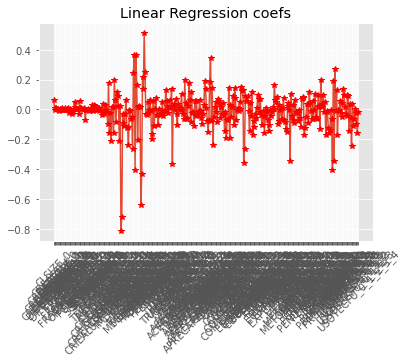

In [14]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler

std_sc = StandardScaler()
#x = std_sc.fit_transform(dataMod.values)
x = dataMod.values
y = datos2['GLOBAL2'].values
#y = data2['LECTURA1'].values
#y = data2['MATES1'].values
#y = data['CIENCIA1'].values
#y = data['GLOBAL2'].values
#y = data['LECTURA2'].values
#y = data['MATES2'].values
#y = data['CIENCIA2'].values


lr_m =  Ridge()
#lr_m =  ElasticNet()
#ajuste sobre la muestra completa, sin split train-test
lr_m.fit(x, y)

print("model intercept: %f" % lr_m.intercept_)

nticks = len(lr_m.coef_)
plt.xticks(range(len(dataMod.columns.to_list())), dataMod.columns.to_list(), rotation=45)
plt.title('Linear Regression coefs')
_ = plt.plot(lr_m.coef_.T, '-', lr_m.coef_.T, 'r*')

In [15]:
#Dataframe con el coeficiente y nombre columna
VarCoef = pd.DataFrame(lr_m.coef_.T,dataMod.columns.to_list()).sort_values(0)
VarCoef ['Cols']=VarCoef.index

In [16]:
VarCoef['GRUPO'] = str(VarCoef['Cols'].values).split('_')[0]

In [17]:
str(VarCoef['Cols'].values).split('_')

["['DIFIDO",
 "0' 'DIFIDO",
 '0',
 "1' 'MECENALU",
 "0' 'MECENALU",
 '0',
 "1' 'POSESTU",
 '0',
 '1',
 "2'\n 'IMHAED",
 '0',
 "1' 'TICAU",
 '0',
 '1',
 "2' 'COMPLECT",
 '0',
 '1',
 '2',
 "3' 'PROIMAGCA",
 '0',
 "1' 'HALEC",
 "0'\n 'COMPLECT",
 '0',
 '1',
 '2',
 '3',
 "4' 'IMEVAL",
 '0',
 '1',
 '2',
 '3',
 "4' 'USOTECCA",
 "0' 'FORDOC",
 '0',
 '1',
 '2',
 "3'\n 'APRECAPEN",
 '0',
 '1',
 '2',
 '3',
 "4' 'CULCENC",
 '0',
 '1',
 "2' 'CRIEALUM",
 "0' 'INTDOC",
 "0'\n 'METICD",
 '0',
 '1',
 '2',
 "3' 'CAPAADAP",
 '0',
 "1' 'CAPADI",
 '0',
 "1' 'PERVIDA",
 "0' 'PROIMAGED",
 '0',
 "1'\n 'NIVEFA",
 '0',
 '1',
 "2' 'EDUFAM",
 '0',
 "1' 'METICD",
 '0',
 '1',
 '2',
 '3',
 "4' 'POSCASA",
 '0',
 "1'\n 'USOTECFU",
 '0',
 '1',
 '2',
 "3' 'EDUTECCEN",
 '0',
 "1' 'CRIEALUM",
 '0',
 '1',
 '2',
 "3' 'AUTOPER",
 '0',
 '1',
 "2'\n 'APOACTEDU",
 '0',
 '1',
 '2',
 "3' 'EXPEPRO",
 '0',
 '1',
 '2',
 '3',
 "4' 'CAMESCO",
 '0',
 '1',
 '2',
 "3' 'RELAPAR",
 '0',
 '1',
 "2'\n 'COOALUM",
 "0' 'EMOASICL",
 "0' 'POSCA

In [18]:
VarCoef2 = VarCoef.sort_values('Cols')

In [19]:
a =[]
for i in VarCoef['Cols']:  
    print(i.split('_'))
    a.append(i.split('_')[0])

['DIFIDO', '0']
['DIFIDO', '0', '1']
['MECENALU', '0']
['MECENALU', '0', '1']
['POSESTU', '0', '1', '2']
['IMHAED', '0', '1']
['TICAU', '0', '1', '2']
['COMPLECT', '0', '1', '2', '3']
['PROIMAGCA', '0', '1']
['HALEC', '0']
['COMPLECT', '0', '1', '2', '3', '4']
['IMEVAL', '0', '1', '2', '3', '4']
['USOTECCA', '0']
['FORDOC', '0', '1', '2', '3']
['APRECAPEN', '0', '1', '2', '3', '4']
['CULCENC', '0', '1', '2']
['CRIEALUM', '0']
['INTDOC', '0']
['METICD', '0', '1', '2', '3']
['CAPAADAP', '0', '1']
['CAPADI', '0', '1']
['PERVIDA', '0']
['PROIMAGED', '0', '1']
['NIVEFA', '0', '1', '2']
['EDUFAM', '0', '1']
['METICD', '0', '1', '2', '3', '4']
['POSCASA', '0', '1']
['USOTECFU', '0', '1', '2', '3']
['EDUTECCEN', '0', '1']
['CRIEALUM', '0', '1', '2', '3']
['AUTOPER', '0', '1', '2']
['APOACTEDU', '0', '1', '2', '3']
['EXPEPRO', '0', '1', '2', '3', '4']
['CAMESCO', '0', '1', '2', '3']
['RELAPAR', '0', '1', '2']
['COOALUM', '0']
['EMOASICL', '0']
['POSCASA', '0', '1', '2']
['PENHOG', '0', '1', '2'

In [20]:
a.sort()

In [21]:
VarCoef2['Grupo'] = a

In [22]:
VarCoef2.groupby('Grupo').sum()

,0
Grupo,
ABSESC,0.120737
ACERESCU,0.264818
ACOESCO,-0.054885
ACTIFIS,-0.027835
APLIEDUFIN,0.034254
APOACTEDU,-0.150986
APRECAPEN,0.322371
ASIREES,-0.045136
AUTOPER,-0.100132


MAE: 3.336	R^2: 0.901


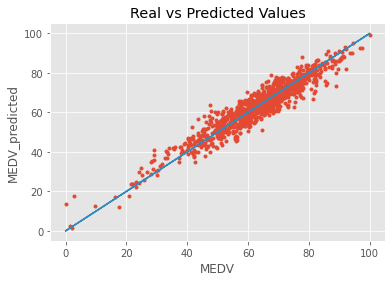

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = np.clip(lr_m.predict(x), 0,  100.)

print("MAE: %.3f\tR^2: %.3f" % (mean_absolute_error(y, y_pred), lr_m.score(x, y)))

plt.title('Real vs Predicted Values')
plt.xlabel('MEDV')
plt.ylabel('MEDV_predicted')
_ = plt.plot(y, y_pred, '.', y, y, '-')

In [24]:
# training /test split
from sklearn.model_selection import train_test_split
testsize = 0.2 # in the [0,1] range. 1: 100%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=testsize, random_state=1)

model intercept: 53795.037721


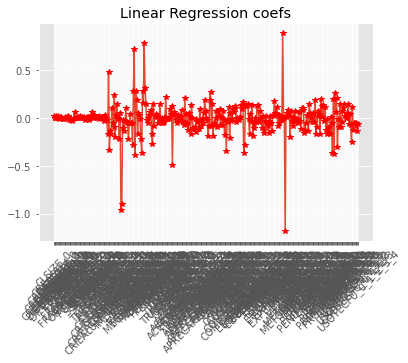

In [25]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

std_sc = StandardScaler()
#x = std_sc.fit_transform(X_train.values)
y = datos2['GLOBAL2'].values
#y = data2['LECTURA1'].values
#y = data2['MATES1'].values
#y = data['CIENCIA1'].values
#y = data2['GLOBAL2'].values
#y = data['LECTURA2'].values
#y = data['MATES2'].values
#y = data['CIENCIA2'].values


lr_m =  Ridge()
#ajuste sobre la muestra completa, sin split train-test
lr_m.fit(X_train, y_train)

print("model intercept: %f" % lr_m.intercept_)

nticks = len(lr_m.coef_)
plt.xticks(range(len(dataMod.columns.to_list())), dataMod.columns.to_list(), rotation=45)
plt.title('Linear Regression coefs')
_ = plt.plot(lr_m.coef_.T, '-', lr_m.coef_.T, 'r*')


MAE: 5.229	R^2: 0.883


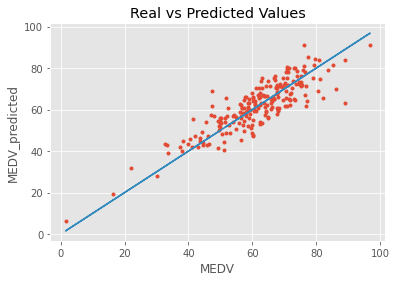

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = np.clip(lr_m.predict(X_test), 0,  100.)

print("MAE: %.3f\tR^2: %.3f" % (mean_absolute_error(y_test, y_pred), lr_m.score(x, y)))

plt.title('Real vs Predicted Values')
plt.xlabel('MEDV')
plt.ylabel('MEDV_predicted')
_ = plt.plot(y_test, y_pred, '.', y_test, y_test, '-')

MAE: 3.163	R^2: 0.883


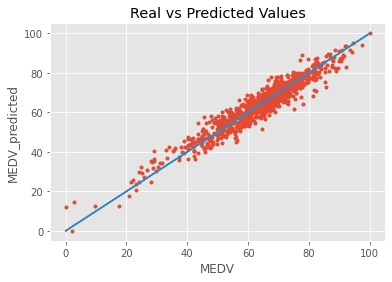

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = np.clip(lr_m.predict(X_train), 0,  100.)

print("MAE: %.3f\tR^2: %.3f" % (mean_absolute_error(y_train, y_pred), lr_m.score(x, y)))

plt.title('Real vs Predicted Values')
plt.xlabel('MEDV')
plt.ylabel('MEDV_predicted')
_ = plt.plot(y_train, y_pred, '.', y_train, y_train, '-')

In [28]:
len(X_train[0])

368

In [29]:
from joblib import dump, load
dump(lr_m, 'Modesc.joblib') 

['Modesc.joblib']

In [30]:
clf = load('Modesc.joblib') 

In [31]:
clf.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}